<div style="color: #aaaaaa">Stefan Sandfeld (2019), The Micromechanical Materials Modelling group, TU Bergakademie Freiberg</div>

# Stress data of the bi-crystal with a curved dislocation near the GB
In the following we show how to read and visualize the stress data along the three plot lines A-C as in Fig. 10 of the paper. Additionally to the shear stress $\sigma_{xz}$ shown already in the paper, this data set contains the full tensorial data. Note that 
- all shown data is already transformed to the local grain coordinate system(s)
- in this convention, XZ-data is identical to the resolved shear


### Import the used python packages

In [1]:
import numpy as np
import pandas as pd
from os.path import join
import matplotlib.pyplot as plt

### Stress along intersection of slip plane with GB
The variable `df` is a PANDAS `dataframe` and contains among others also all stress tensor components (see below).

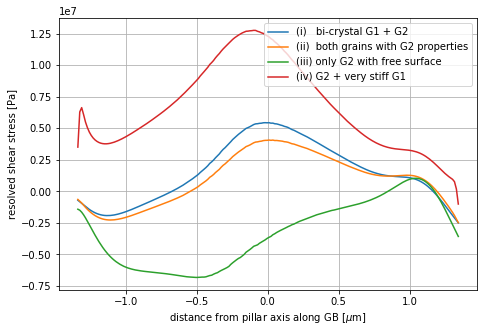

In [2]:
path = "intersection_of_slip_plane_with_GB"
filenames = ['stress_G1_G2_slip_line.pkl', 
             'stress_G1_wie_G2_slip_line.pkl', 
             'stress_only_G2_slip_line.pkl', 
             'stress_stiff_G1_slip_line.pkl']
labels = ["(i)   bi-crystal G1 + G2",
         "(ii)  both grains with G2 properties",
         "(iii) only G2 with free surface",
         "(iv) G2 + very stiff G1"]

fig, ax = plt.subplots(figsize=(7.5,5))

for filename, label in zip(filenames, labels):
    df = np.load(join(path, filename), allow_pickle=True)
    ax.plot(1e6 * df['arclength'], df['sxz'], label=label)
    
ax.set(ylabel=r'resolved shear stress [Pa]', 
       xlabel=r'distance from pillar axis along GB [$\mu$m]')
ax.grid(True)
plt.legend();

In [3]:
# Show content of the last dataframe object. The sx, sy, sz are the 
# normal stresses, the sxy,... are the shear stresses
df.head()

arclength         x             y             z        x_orig  \
0  -0.000001  0.000001  1.261453e-07  5.546866e-07 -2.000000e-08   
1  -0.000001  0.000001  1.243506e-07  5.488169e-07 -2.000000e-08   
2  -0.000001  0.000001  1.225559e-07  5.429472e-07 -2.000000e-08   
3  -0.000001  0.000001  1.207613e-07  5.370776e-07 -2.000000e-08   
4  -0.000001  0.000001  1.189666e-07  5.312079e-07 -2.000000e-08   

         y_orig        z_orig            sx            sy            sz  \
0 -9.950000e-07  8.344518e-07 -2.941307e+06 -1.179527e+07 -1.105783e+07   
1 -9.850000e-07  8.254468e-07 -7.056190e+06 -1.120988e+07 -1.289533e+07   
2 -9.750000e-07  8.164419e-07 -9.658167e+06 -1.036250e+07 -1.212055e+07   
3 -9.650000e-07  8.074369e-07 -1.016615e+07 -9.517786e+06 -1.084210e+07   
4 -9.550000e-07  7.984320e-07 -9.924520e+06 -8.738025e+06 -9.731914e+06   

            sxy           syz           sxz  
0 -5.676486e+06  6.262226e+06  3.502483e+06  
1 -7.007139e+06  5.221029e+06  6.288585e+06  
2 -6.702665e+06  3.696139e+06  6.630684e+06  
3 -5.980849e+06  2.765553e+06  6.081420e+06  
4 -5.426753e+06  2.226884e+06  5.488010e+06

## Plot through G1 + G2 along x
Again, the dataframes contain all stress components. The x, y, z are the local coordinates and are not used here.

Since the plot line is now running through both grains, we have to take into account that each grain has a different coordinate system. This transformation has already been performed with the data contained in the following files. 

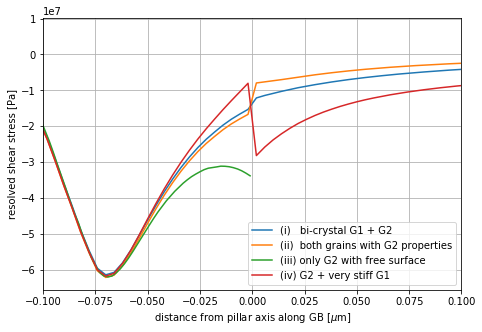

In [4]:
path = "through_grains_along_x"
basenames = ['stress_G1_G2_along_x', 
             'stress_G1_wie_G2_along_x', 
             'stress_only_G2_along_x', 
             'stress_stiff_G1_along_x']
labels = ["(i)   bi-crystal G1 + G2",
         "(ii)  both grains with G2 properties",
         "(iii) only G2 with free surface",
         "(iv) G2 + very stiff G1"]

fig, ax = plt.subplots(figsize=(7.5,5))

for basename, label in zip(basenames, labels):
    # The line data is split into two parts - one for each grains
    df1 = np.load(join(path, basename + "__G1_CS.pkl"), allow_pickle=True)
    df2 = np.load(join(path, basename + "__G2_CS.pkl"), allow_pickle=True)
    x = list(1e6 * df2['x_orig']) + list(1e6 * df1['x_orig'])
    sig = list(df2['sxz']) + list(df1['sxz'])
    ax.plot(x, sig, label=label)
    
ax.set(ylabel=r'resolved shear stress [Pa]', 
       xlabel=r'distance from pillar axis along GB [$\mu$m]',
      xlim=(-0.1, 0.1))
ax.grid(True)
plt.legend();

In [5]:
df1.head()

arclength             x             y             z        x_orig  \
250   0.000001  1.123100e-09  1.243288e-09 -1.092191e-09  2.000000e-09   
251   0.000001  3.369301e-09  3.729863e-09 -3.276573e-09  6.000000e-09   
252   0.000001  5.615502e-09  6.216438e-09 -5.460956e-09  1.000000e-08   
253   0.000001  7.861703e-09  8.703013e-09 -7.645338e-09  1.400000e-08   
254   0.000001  1.010790e-08  1.118959e-08 -9.829720e-09  1.800000e-08   

     y_orig  z_orig            sx            sy            sz           sxy  \
250     0.0     0.0  2.360498e+07 -2.590566e+06 -1.005447e+08 -4.815700e+07   
251     0.0     0.0  2.102289e+07  4.796600e+05 -9.491208e+07 -4.627744e+07   
252     0.0     0.0  1.868054e+07  2.938741e+06 -9.010616e+07 -4.436289e+07   
253     0.0     0.0  1.672772e+07  5.027551e+06 -8.588778e+07 -4.255127e+07   
254     0.0     0.0  1.505310e+07  6.699767e+06 -8.208398e+07 -4.079750e+07   

              syz           sxz  
250 -1.528989e+07 -2.817181e+07  
251 -1.449253e+07 -2.580542e+07  
252 -1.386135e+07 -2.380283e+07  
253 -1.341629e+07 -2.210012e+07  
254 -1.305250e+07 -2.057777e+07

## Plot through G2 along y

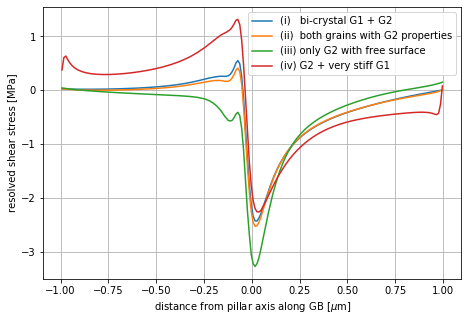

In [6]:
path = "along_y_inside_G2"
filenames = ['stress_G1_G2_along_y.pkl', 
             'stress_G1_wie_G2_along_y.pkl', 
             'stress_only_G2_along_y.pkl', 
             'stress_stiff_G1_along_y.pkl']
labels = ["(i)   bi-crystal G1 + G2",
         "(ii)  both grains with G2 properties",
         "(iii) only G2 with free surface",
         "(iv) G2 + very stiff G1"]

fig, ax = plt.subplots(figsize=(7.5,5))

for filename, label in zip(filenames, labels):
    df = np.load(join(path, filename), allow_pickle=True)
    ax.plot(1e6 * df['arclength'], 1e-7 * df['sxz'], label=label)
    
ax.set(ylabel=r'resolved shear stress [MPa]', 
       xlabel=r'distance from pillar axis along GB [$\mu$m]')
ax.grid(True)
plt.legend();